In [2]:
# add this if using colab 
!pip install split-folders


import os
import numpy as np
import pandas as pd

# plot
import glob
# import cv2
import matplotlib.pyplot as plt

# tf
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

import splitfolders

import pathlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Data Collecting

Dataset diambil dari website kaggle.

### Tujuan PA

Membuat sebuah model yang dapat mengenali jenis dari serangga dengan menggunakan algoritma CNN.

Batasan:
  - Model ini hanya dapat mengenali:
    - Kupu - Kupu, 
    - Capung, 
    - Nyamuk, 
    - Belalang,
    - dan Kumbang.

### Deskripsi Dataset

Dataset ini berupa gambar dari 5 serangga berbeda.

### Jumlah Dataset

- Kupu - Kupu: 899
- Capung: 1036
- Nyamuk: 690
- Belalang: 960
- Kumbang: 864

Total: 4449 data

### Data Train & Validation

<!-- if URL path ke direktori dataset. -->
berupa direktori dataset.
dan dataset output (dataset yang akan dihasilkan ketika melakukan split folder). 

In [3]:
# uncomment if using google colab
from google.colab import drive
drive.mount('/content/drive')
url = '/content/drive/MyDrive/Dataset'
     

# uncomment if using local env
# url = 'insect'


url_split = 'dataset_output'

Mounted at /content/drive


In [4]:
splitfolders.ratio(url, output=url_split, seed=42, ratio=(0.7,0.2,0.1), group_prefix=None)

Copying files: 4449 files [01:22, 54.24 files/s] 


Disini saya menggunakan Image data generator dan batch size sebanyak 128
untuk validation, saya menggunakan 20% data.
Kemudian untuk subset training dan validation, target size nya adalah 120.

ambil path dari folder masing - masing output

In [129]:
train = 'dataset_output/train'
val = 'dataset_output/val'
test = 'dataset_output/test'

In [130]:
batch_size = 128

train_image_generator = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=45,
    width_shift_range= 0.2,
    height_shift_range=0.2,
    zoom_range= 0.2,
    horizontal_flip=True,
    validation_split= 0.1,
    fill_mode='nearest',
) #data preprocessing

train = train_image_generator.flow_from_directory(
    train, 
    target_size=(120,120),
    batch_size=batch_size, 
    # color_mode="grayscale"
)

test = train_image_generator.flow_from_directory(
    test, 
    target_size=(120,120),
    batch_size=batch_size,
    # color_mode="grayscale"
)

val = train_image_generator.flow_from_directory(
    val, 
    target_size=(120,120),
    batch_size=batch_size,
    # color_mode="grayscale"
)

Found 3112 images belonging to 5 classes.
Found 449 images belonging to 5 classes.
Found 888 images belonging to 5 classes.


### Visualisasi Dataset

In [131]:
class_names = os.listdir('dataset_output/train/')
class_names

['Ladybird', 'Butterfly', 'Dragonfly', 'Mosquito', 'Grasshopper']

**Preview Dataset**

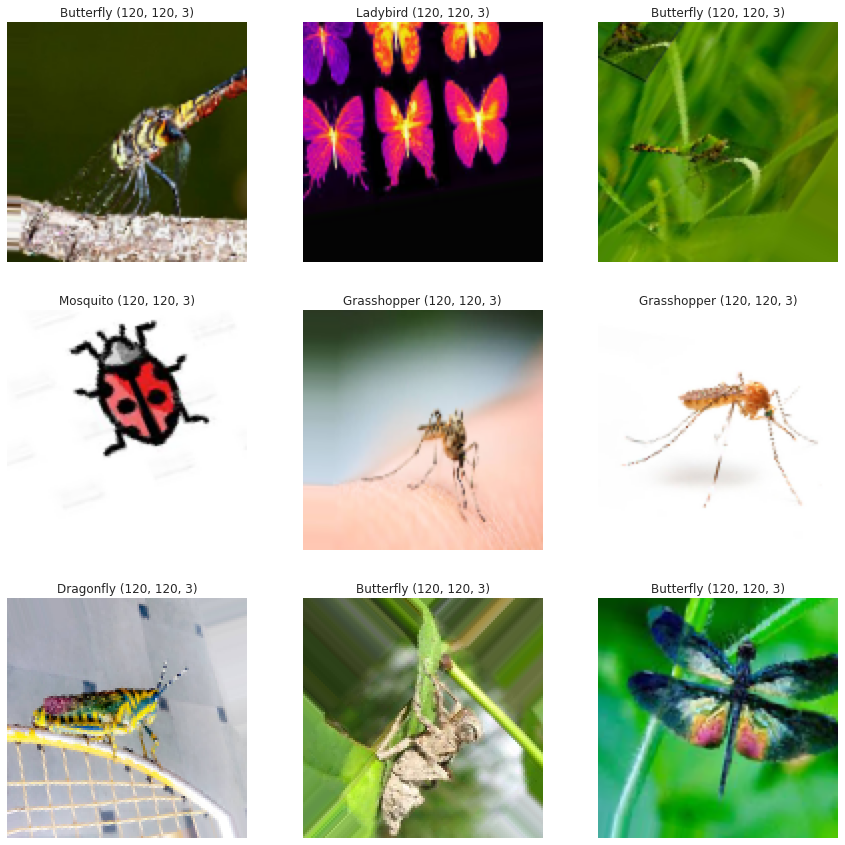

In [132]:
img,label = train.next() 
# Buat folder dlu disesuaikan sama nama di save_to_dir
plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(img[i], cmap='gray')
    plt.title(f'{class_names[tf.argmax(label[i])]} {img[i].shape}')
    plt.axis('off')

**Metadata**

In [133]:
# folder
path = url

# lokasi train
path_train = 'dataset_output/train'

# lokasi test
path_test = 'dataset_output/test'

# lokasi validation
path_val = 'dataset_output/val'

def getSize():
    count = 0
    data_dir = pathlib.Path(path)
    count += len(list(data_dir.glob('*/*.jpg')))
    return count


def getSizeTrain():
    count = 0
    data_dir = pathlib.Path(path_train)
    count += len(list(data_dir.glob('*/*.jpg')))
    return count

def getSizeTest():
    count = 0
    data_dir = pathlib.Path(path_test)
    count += len(list(data_dir.glob('*/*.jpg')))
    return count

def getSizeVal():
    count = 0
    data_dir = pathlib.Path(path_val)
    count += len(list(data_dir.glob('*/*.jpg')))
    return count



In [134]:
print("Nama Dataset      : Insect")
print("URL               : https://www.kaggle.com/search?q=insect+dataset" )
print("Image shape       :", img[0].shape)
print("Jumlah Data       :", getSize())
print("Jumlah Data Train :", getSizeTrain())
print("Jumlah Data Test  :", getSizeTest())
print("Jumlah Data val   :", getSizeVal())
print("Seluruh class     :", class_names)

Nama Dataset      : Insect
URL               : https://www.kaggle.com/search?q=insect+dataset
Image shape       : (120, 120, 3)
Jumlah Data       : 4449
Jumlah Data Train : 3112
Jumlah Data Test  : 449
Jumlah Data val   : 888
Seluruh class     : ['Ladybird', 'Butterfly', 'Dragonfly', 'Mosquito', 'Grasshopper']


**Class Distribution**

In [135]:
class_size = []

for i in os.listdir(path_train):
    image_count = 0
    data_dir = pathlib.Path(path_train + '/' +i)
    image_count = len(os.listdir(data_dir))
    class_size.append(image_count)

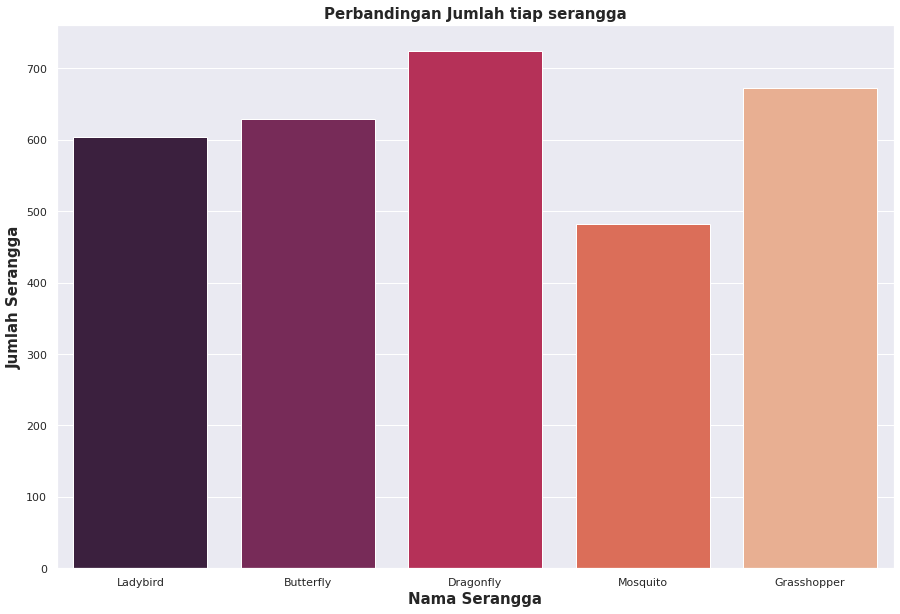

In [136]:
import seaborn as sns
sns.set_theme()
plt.figure(figsize=(15,10))

sns.barplot(x=class_names,y=class_size,palette='rocket')
plt.title("Perbandingan Jumlah tiap serangga",fontfamily='arial',fontsize=15, fontweight='bold')
plt.xlabel('Nama Serangga',fontfamily='arial',fontsize=15, fontweight='bold')
plt.ylabel('Jumlah Serangga',fontfamily='arial',fontsize=15, fontweight='bold')
plt.show()

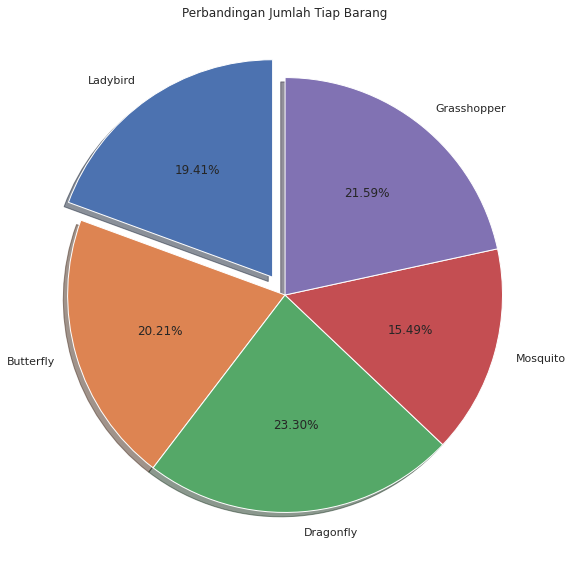

In [137]:
plt.figure(figsize=(10,10))
plt.pie(class_size, labels=class_names,startangle=90,autopct='%.2f%%',shadow=True,explode=(0.10,0,0,0,0))
plt.title('Perbandingan Jumlah Tiap Barang')
plt.show()

In [138]:
# rows = 2
# cols = 3
# # fig = plt.figure(figsize=(7,8))
# # for j in range (0, rows*cols):
# #     fig.add_subplot(rows, cols, j+1)
# #     plt.imshow(img[j])

# for i in range(0, len(img), rows*cols):
#     fig = plt.figure(figsize=(7,8))
#     for j in range (0, rows*cols):
#         fig.add_subplot(rows, cols, j+1)
#         plt.imshow(img[j])
#         # plt.imshow(img[i+j])
#     plt.show()

In [139]:
# plt.title(label_name[tf.argmax(label[2])])
# plt.imshow(image[2])
# plt.show()

# Model 

Pada syntax di atas model dibentuk dengan suatu layer convo 2 dimensi dari size 120 x 120 pixels dimana fungsi aktivasinya adalah. Terdapat dua pembuatan layer convo, sehingga dilanjutkan dengan pembuatan layer max pooling dan pembuatan layer dropout. Karena ini adalah pelatihan deep learning maka perlu pelatihan lagi dengan membuat lagi layer untuk pelatihan. Kemudian dilanjutkan dengan layer flatten dan layer dense sampai dengan proses kompilasi.



In [158]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(120, 120, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.ke ras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
        
    tf.keras.layers.Conv2D(1024, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3), # drop neuron secara random

    tf.keras.layers.Flatten(), # untuk jadikan 1dimensi

    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1024, activation='relu'), 
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(5, activation='softmax'), #multiclass pakai softmax
])

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# adam untuk mengurangi overfitting


In [159]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_83 (Conv2D)          (None, 118, 118, 64)      1792      
                                                                 
 max_pooling2d_69 (MaxPoolin  (None, 59, 59, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_84 (Conv2D)          (None, 57, 57, 128)       73856     
                                                                 
 max_pooling2d_70 (MaxPoolin  (None, 28, 28, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_85 (Conv2D)          (None, 26, 26, 256)       295168    
                                                                 
 max_pooling2d_71 (MaxPoolin  (None, 13, 13, 256)    

In [160]:
# monitor_loss_callbacks = tf.keras.callbacks.EarlyStopping(patience=10)
class StopTrain(tf.keras.callbacks.Callback):
    def __init__(self, val):
        self.val = val

    def on_epoch_end(self, epoch, logs=None): 
        accuracy = logs["val_accuracy"]
        if (accuracy >= self.val) :
            self.model.stop_training = True

In [161]:
# coba pakai callback custom misalnya: stop kalau accuracy train > 95%, dan earlystopping
# history = model.fit(train, validation_data=val, epochs=50)
history = model.fit(train, validation_data=val, epochs=200, callbacks=StopTrain(0.75))

Epoch 1/200
25/25 [==============================] - 24s 925ms/step - loss: 1.5702 - accuracy: 0.2876 - val_loss: 1.4938 - val_accuracy: 0.3457
Epoch 2/200
25/25 [==============================] - 22s 887ms/step - loss: 1.4546 - accuracy: 0.3589 - val_loss: 1.4027 - val_accuracy: 0.3559
Epoch 3/200
25/25 [==============================] - 22s 884ms/step - loss: 1.3647 - accuracy: 0.3882 - val_loss: 1.3331 - val_accuracy: 0.4358
Epoch 4/200
25/25 [==============================] - 22s 883ms/step - loss: 1.3328 - accuracy: 0.3978 - val_loss: 1.2711 - val_accuracy: 0.4561
Epoch 5/200
25/25 [==============================] - 22s 888ms/step - loss: 1.2761 - accuracy: 0.4251 - val_loss: 1.2248 - val_accuracy: 0.4944
Epoch 6/200
25/25 [==============================] - 22s 885ms/step - loss: 1.2383 - accuracy: 0.4515 - val_loss: 1.2839 - val_accuracy: 0.4392
Epoch 7/200
25/25 [==============================] - 22s 888ms/step - loss: 1.2420 - accuracy: 0.4608 - val_loss: 1.2598 - val_accuracy:

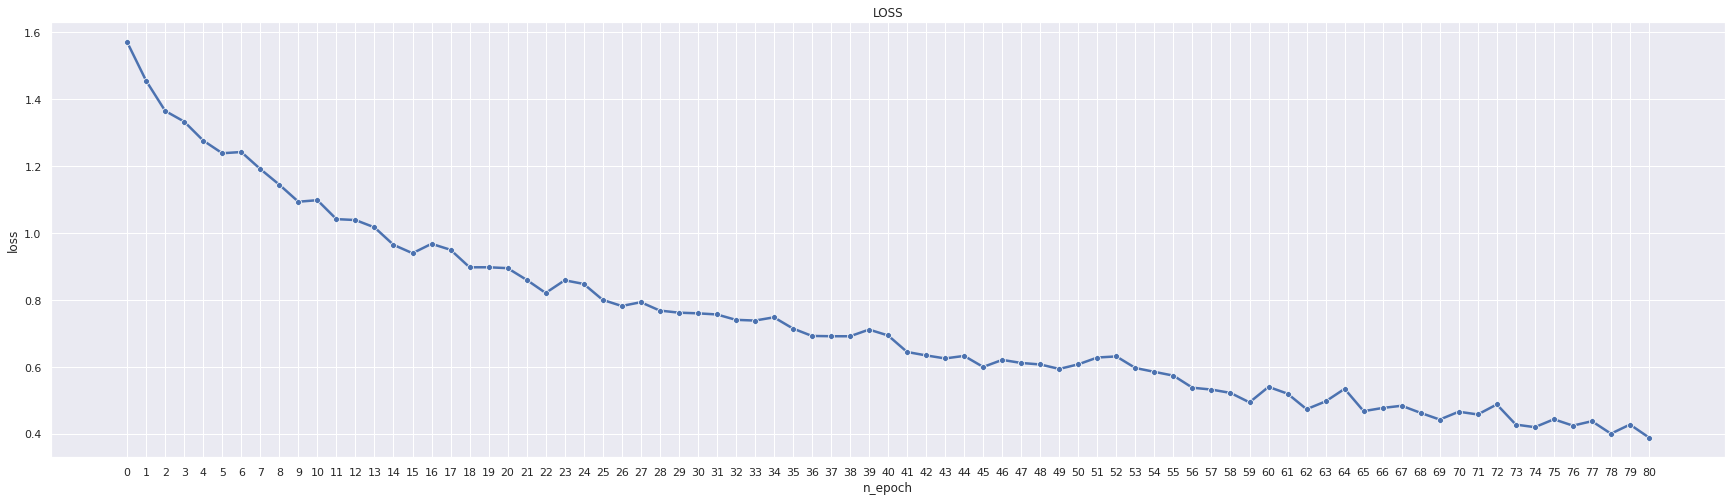

In [162]:
loss_per_epoch = history.history["loss"]
n_epoch = list(range(len(loss_per_epoch)))

plt.figure(figsize=(30, 8))
sns.lineplot(data=loss_per_epoch, linewidth=2.5, marker="o", linestyle='solid').set(xlabel='n_epoch', ylabel='loss', title='LOSS', xticks=n_epoch)
plt.show()

In [163]:
model.save('./model/model_finished.h5')

## Evaluasi

In [164]:
model.evaluate(test)

4/4 [==============================] - 2s 561ms/step - loss: 0.8915 - accuracy: 0.7060


[0.8915262818336487, 0.7060133814811707]

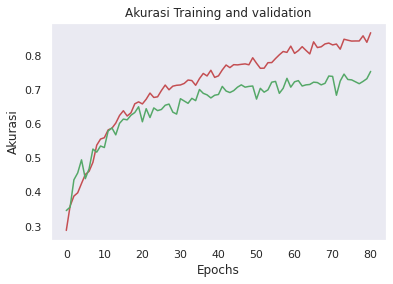

In [165]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Akurasi Training')
plt.plot(epochs, val_acc, 'g', label='Akurasi Validation')

plt.xlabel('Epochs')
plt.ylabel('Akurasi')
plt.title('Akurasi Training and validation')
plt.grid(axis='both')

plt.show() 

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(1, figsize=(4,4))
plt.plot(epochs,  acc, c='r', label='training')
plt.plot(epochs,  val_acc, c='r', label='validation')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('akurasi')

plt.figure(1, figsize=(4,4))
plt.plot(epochs,  loss, c='r', label='training')
plt.plot(epochs,  epochs, c='r', label='validation')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('akurasi')

plt.show()

# plt.plot(epochs, acc, 'r', label='Akurasi Training')
# plt.plot(epochs, val_acc, 'g', label='Akurasi Validation')

# plt.xlabel('Epochs')
# plt.ylabel('Akurasi')
# plt.title('Akurasi Training and validation')
# plt.grid(axis='both')

# plt.show() 